In [1]:
import sys, os, pickle, time, json, yaml, re
from glob import glob
sys.path.append('../lib')
sys.path.append('../analysis')
import numpy as np
import pandas as pd
import root_numpy as rtnp
from analysis_utilities import drawOnCMSCanvas, getEff, DSetLoader
from collections import Counter
from prettytable import PrettyTable
import matplotlib.pyplot as plt
from scipy.stats import chi2 as scipy_chi2

Welcome to JupyROOT 6.12/07


In [2]:
candDir='ntuples_B2DstMu_mediumId'
skimmedTag=''
MCsample = {
######## Signals
'tau': DSetLoader('Bd_TauNuDst', candDir=candDir, skimmedTag=skimmedTag),
'mu': DSetLoader('Bd_MuNuDst', candDir=candDir, skimmedTag=skimmedTag),
######## D** background
'Bu_MuDstPi': DSetLoader('Bu_MuNuDstPi', candDir=candDir, skimmedTag=skimmedTag),
'Bd_MuDstPi': DSetLoader('Bd_MuNuDstPi', candDir=candDir, skimmedTag=skimmedTag),
# 'Bd_MuDstPiPi': DSetLoader('Bd_MuNuDstPiPi', candDir=candDir, skimmedTag=args.skimmedTag),
'Bd_MuDstPiPi': DSetLoader('Bd_MuNuDstPiPi_v2', candDir=candDir, skimmedTag=skimmedTag),
'Bu_MuDstPiPi': DSetLoader('Bu_MuNuDstPiPi', candDir=candDir, skimmedTag=skimmedTag),
'Bu_TauDstPi': DSetLoader('Bu_TauNuDstPi', candDir=candDir, skimmedTag=skimmedTag),
'Bd_TauDstPi': DSetLoader('Bd_TauNuDstPi', candDir=candDir, skimmedTag=skimmedTag),
'Bd_TauDstPiPi': DSetLoader('Bd_TauNuDstPiPi', candDir=candDir, skimmedTag=skimmedTag),
'Bu_TauDstPiPi': DSetLoader('Bu_TauNuDstPiPi', candDir=candDir, skimmedTag=skimmedTag),
'Bs_MuDstK': DSetLoader('Bs_MuNuDstK', candDir=candDir, skimmedTag=skimmedTag),
'Bs_TauDstK': DSetLoader('Bs_TauNuDstK', candDir=candDir, skimmedTag=skimmedTag),
######## D*Hc background
'Bd_DstDu': DSetLoader('Bd_DstDu', candDir=candDir, skimmedTag=skimmedTag),
'Bu_DstDu': DSetLoader('Bu_DstDu', candDir=candDir, skimmedTag=skimmedTag),
'Bd_DstDd': DSetLoader('Bd_DstDd', candDir=candDir, skimmedTag=skimmedTag),
'Bu_DstDd': DSetLoader('Bu_DstDd', candDir=candDir, skimmedTag=skimmedTag),
'Bd_DstDs': DSetLoader('Bd_DstDs', candDir=candDir, skimmedTag=skimmedTag),
'Bs_DstDs': DSetLoader('Bs_DstDs', candDir=candDir, skimmedTag=skimmedTag),
}

In [3]:
df = pd.DataFrame(rtnp.root2array(MCsample['Bd_MuDstPiPi'].skimmed_dir + '/High_trkCtrl_bare.root'))

In [5]:
# Get pm control region
sel = np.logical_and(df['tkCharge_0']+df['tkCharge_1'] == 0, df['N_goodAddTks'] == 2)
df = df[sel]

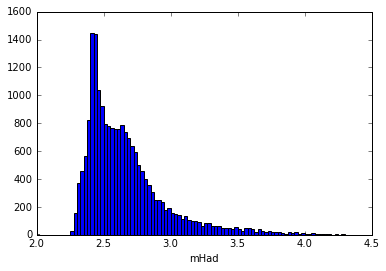

In [17]:
plt.hist(df['massHadTks'], bins = 100, range=(2.,4.5))
plt.xlabel('mHad');

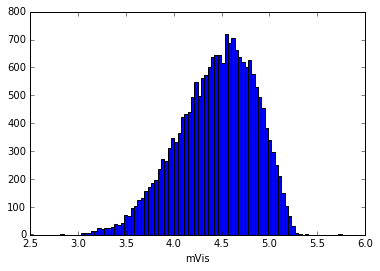

In [20]:
plt.hist(df['massVisTks'], bins = 100, range=(2.5,6))
plt.xlabel('mVis');

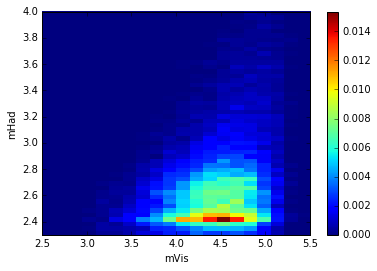

In [31]:
h = plt.hist2d(df['massVisTks'], df['massHadTks'], 
               bins = (20, 50), range=((2.5, 5.5),(2.3, 4)), 
               weights=np.ones(df.shape[0])/float(df.shape[0])
              )
plt.ylabel('mHad')
plt.xlabel('mVis')
plt.colorbar(h[3]);

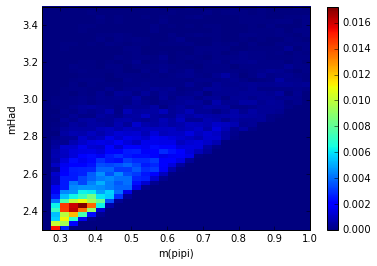

In [36]:
h = plt.hist2d(df['massTks_pipi'], df['massHadTks'], 
               bins = (30, 50), range=((0.25, 1.),(2.3, 3.5)), 
               weights=np.ones(df.shape[0])/float(df.shape[0])
              )
plt.ylabel('mHad')
plt.xlabel('m(pipi)')
plt.colorbar(h[3]);

Process categorization

In [38]:
for c in df.columns:
    if c.startswith('MC'):
        print c

MC_nAddOgB
MC_bestBB_dR
MC_bestBB_dphi
MC_bestBB_mass
MC_q2
MC_Est_mu
MC_M2_miss
MC_B_pt
MC_B_eta
MC_B_phi
MC_B_ctau
MC_Dst_pt
MC_Dst_eta
MC_Dst_phi
MC_mu_pt
MC_mu_eta
MC_mu_phi
MC_mu_TransvIP_PV
MC_mu_TransvIP_vtxDst
MC_mu_IP_vtxDst
MC_pi_pt
MC_pi_eta
MC_pi_phi
MC_K_pt
MC_K_eta
MC_K_phi
MC_pis_pt
MC_pis_eta
MC_pis_phi
MC_idxMatch
MC_muMotherPdgId
MC_munuSisterPdgId_0
MC_munuSisterPdgId_1
MC_MassCharmedBDaughter
MC_DstMotherPdgId
MC_CharmedDstSisPdgId
MC_StrangeDstSisPdgId
MC_nAddCharged
MC_addCharged_SumQ
MC_nAddNeutral
MC_tkFlag_0
MC_tkFlag_1
MC_tkFromMainB_0
MC_tkFromMainB_1
MC_tk_dpt_0
MC_tk_dpt_1
MC_tk_deta_0
MC_tk_deta_1
MC_tk_dphi_0
MC_tk_dphi_1
MC_tkPdgId_0
MC_tkPdgId_1
MC_tkMotherPdgId_0
MC_tkMotherPdgId_1
MC_tkMotherMotherPdgId_0
MC_tkMotherMotherPdgId_1
MC_nInteractions


In [41]:
Counter(np.abs(df['MC_munuSisterPdgId_0']))

Counter({415.0: 839,
         425.0: 339,
         10413.0: 2463,
         10423.0: 1062,
         20413.0: 2055,
         20423.0: 752,
         100413.0: 12483})

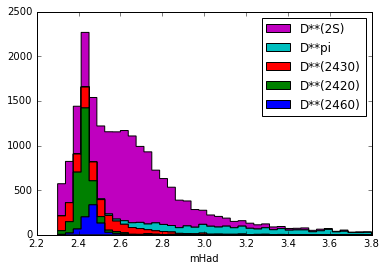

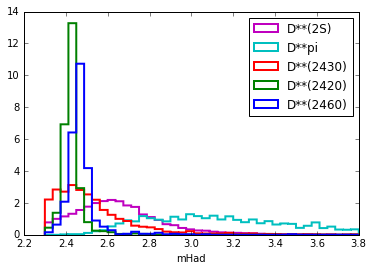

In [79]:
labels = []
auxData = []

auxData.append( df['massHadTks'][np.isin(np.abs(df['MC_munuSisterPdgId_0']), [415])] )
labels.append('D**(2460)')

auxData.append( df['massHadTks'][np.isin(np.abs(df['MC_munuSisterPdgId_0']), [10413])] )
labels.append('D**(2420)')

auxData.append( df['massHadTks'][np.isin(np.abs(df['MC_munuSisterPdgId_0']), [20413])] )
labels.append('D**(2430)')

auxData.append( df['massHadTks'][np.isin(np.abs(df['MC_munuSisterPdgId_0']), [425, 10423, 20423])] )
labels.append('D**pi')

auxData.append( df['massHadTks'][np.isin(np.abs(df['MC_munuSisterPdgId_0']), [100413.0])] )
labels.append('D**(2S)')


plt.figure()
plt.hist(auxData, label=labels, bins=40, range=(2.3,3.8), histtype='stepfilled', stacked=True)
plt.legend(loc='best')
plt.xlabel('mHad');

plt.figure()
plt.hist(auxData, label=labels, bins=40, range=(2.3,3.8), histtype='step', stacked=False, normed=True, lw=2)
plt.legend(loc='best')
plt.xlabel('mHad');

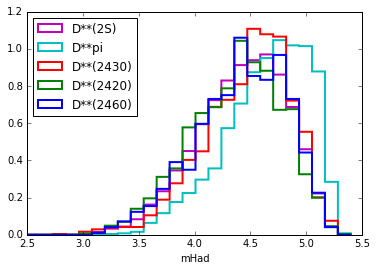

In [76]:
var='massVisTks'
auxData = []
auxData.append( df[var][np.isin(np.abs(df['MC_munuSisterPdgId_0']), [415])] )
auxData.append( df[var][np.isin(np.abs(df['MC_munuSisterPdgId_0']), [10413])] )
auxData.append( df[var][np.isin(np.abs(df['MC_munuSisterPdgId_0']), [20413])] )
auxData.append( df[var][np.isin(np.abs(df['MC_munuSisterPdgId_0']), [425, 10423, 20423])] )
auxData.append( df[var][np.isin(np.abs(df['MC_munuSisterPdgId_0']), [100413.0])] )

plt.hist(auxData, label=labels, bins=25, range=(2.5,5.4), histtype='step', normed=True, lw=2)
plt.legend(loc='upper left')
plt.xlabel('mVis');